# Thiết kế 1: Chỉ sử dụng hàm 

Đây là 1 trong 3 phần của bài thực hành về những phong cách viết code khác nhau trong Python, phần này minh họa về cách tiếp cận không dùng OOP, chỉ sử dụng các hàm rời. 
2 phần kia trình bày về cách tiếp cận bằng OOP Inheritance và OOP Composition, có thể tải tại đây:

https://github.com/kinokoberuji/Python-snipets/tree/master/GOF/Designs


# Mục tiêu

Nhắc lại về tình huống hiện thời: Chúng ta có 3 file pickles chứa dữ liệu thô của xét nghiệm đa ký hô hấp (PG) (BN_C_Polygraph.pkl), một cảm biến hô hấp mới dùng công nghệ Accelerometer (BN_C_Sensor.pkl), và danh sách các biến cố ngưng/giảm thở khi ngủ (BN_C_Scoring.pkl) của bệnh nhân C.

Mục tiêu là viết 1 chương trình cho phép hiển thị các tín hiệu PG và Acc cho một biến cố hô hấp tùy chọn trong danh sách, với yêu cầu:

1) Nếu là tín hiệu PG, hiển thị 3 kênh RIP thorax, Abdominal và lưu lượng thông khí qua mũi (flux th).

2) Nếu là tín hiệu Acc, cần xác định thêm giới hạn trên và dưới của biên độ dao động 3 kênh X,Y,Z của cảm biến.

# Source code

Nội dung chi tiết của code nằm trong module Functional.py :
https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Designs/Functional.py

Ta sử dụng module này như sau:

In [2]:
from Functional import *

Khi không sử dụng OOP mà chỉ viết các hàm đơn, bạn phải nhớ tên và công dụng tất cả những hàm mà mình đã tạo ra, cũng như trình tự áp dụng chúng. Đây là một nhược điểm của cách làm việc này.

Thí dụ cho trường hợp tín hiệu PG: Bước đầu tiên, Nhi dùng hàm load_data để tải tín hiệu và lưu vào object db:

In [3]:
db = load_data('BN_C_Polygraph.pkl')

db

{'Raw_signal':                                    rip.thrx   rip.abdom   flow th
 2021-01-06 21:15:59+01:00         -0.186943   -0.545151  0.004824
 2021-01-06 21:15:59.100000+01:00  -1.377279   -3.991766  0.022688
 2021-01-06 21:15:59.200000+01:00  -4.872397  -14.034524  0.020083
 2021-01-06 21:15:59.300000+01:00 -11.285942  -32.307165 -0.133299
 2021-01-06 21:15:59.400000+01:00 -19.698049  -56.011040 -0.625545
 ...                                     ...         ...       ...
 2021-01-07 07:31:21.600000+01:00  -2.456800  106.826074  7.650922
 2021-01-07 07:31:21.700000+01:00 -17.280214   63.458553  2.196249
 2021-01-07 07:31:21.800000+01:00 -29.432697   20.147200  0.650861
 2021-01-07 07:31:21.900000+01:00 -37.686055  -20.730739  1.760793
 2021-01-07 07:31:22+01:00        -41.703434  -57.430206  3.912254
 
 [369231 rows x 3 columns]}

Sau đó, dùng chính hàm này để tải dữ liệu Danh sách biến cố (vì cả 2 đều là dataframe, đều tải từ file pickle nên ta có thể dùng chung 1 hàm cho 2 việc).

In [4]:
psg_score = load_data('BN_C_Scoring.pkl')

psg_score

{'PSG_score':                              start_t                            end_t  Score  \
 0          2021-01-06 21:21:34+01:00        2021-01-06 21:21:50+01:00    161   
 1   2021-01-06 21:24:54.800000+01:00 2021-01-06 21:25:23.700000+01:00    290   
 3   2021-01-06 21:26:14.800000+01:00        2021-01-06 21:26:45+01:00    303   
 4   2021-01-06 21:27:02.700000+01:00 2021-01-06 21:27:32.600000+01:00    300   
 6   2021-01-06 21:28:23.400000+01:00 2021-01-06 21:28:49.100000+01:00    258   
 ..                               ...                              ...    ...   
 475 2021-01-07 07:23:31.900000+01:00 2021-01-07 07:23:53.900000+01:00    221   
 476 2021-01-07 07:24:09.300000+01:00 2021-01-07 07:24:39.500000+01:00    303   
 477 2021-01-07 07:24:56.400000+01:00 2021-01-07 07:25:26.300000+01:00    300   
 479        2021-01-07 07:27:03+01:00 2021-01-07 07:27:33.600000+01:00    307   
 480 2021-01-07 07:30:14.100000+01:00 2021-01-07 07:30:42.800000+01:00    288   
 
      Lab  
 

Sau đó, Nhi có thể gọi hàm visualize_signal để vẽ hình:

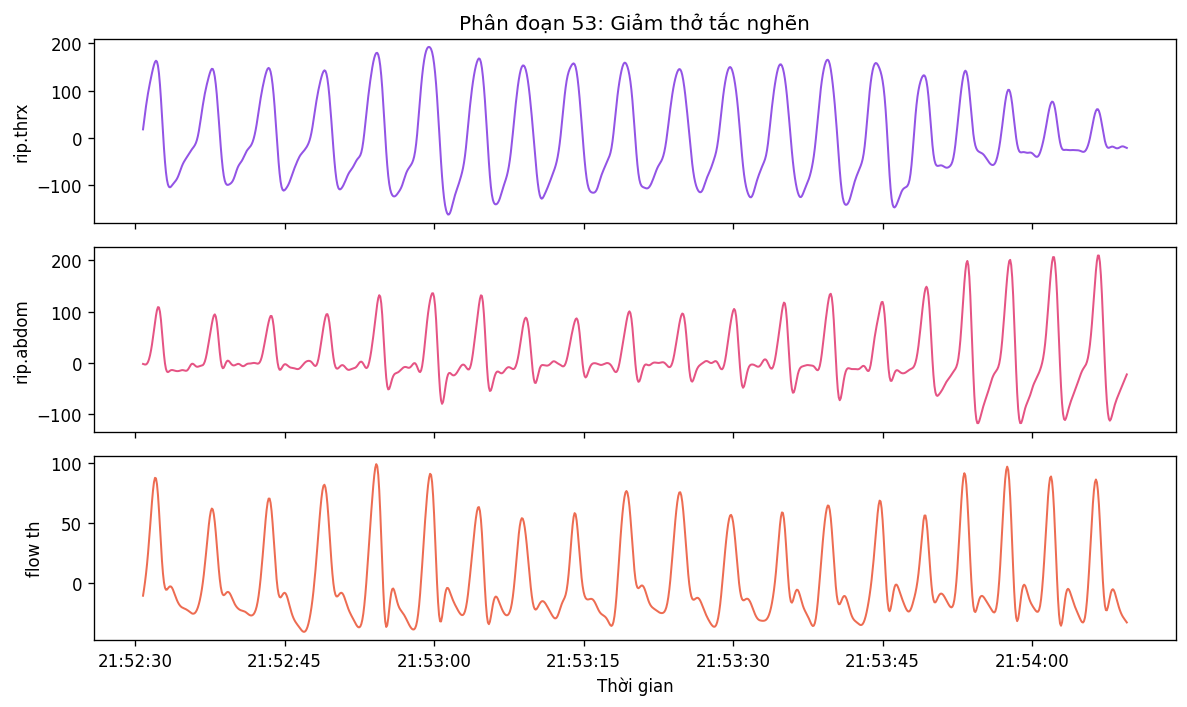

In [11]:
visualize_signal(raw_df = db['Raw_signal'], 
                    evt_lst = psg_score['PSG_score'], 
                    idx = 53,
                    visible = True)

Cho trường hợp tín hiệu Accelerometer, Nhi phải tải tín hiệu từ file BN_C_Sensor.pkl, 

In [12]:
acc_db = load_data('BN_C_Sensor.pkl')

Sau đó dùng hàm multi_envelop để ước tính 2 ngưỡng trên và dưới của biên độ dao động:

In [17]:
lb, ub = multi_envelop(df = acc_db['Raw_signal'], w = 10)

Khi đọc source code, bạn sẽ thấy có 2 hàm visualize_signal và visualize_envelop, hàm visualize_envelop dùng cho trường hợp tín hiệu là Acc, nó sẽ gọi hàm visualize signal bên trong để vẽ trước 3 kênh tín hiệu nhưng không in biểu đồ ra bằng plt.show, mà tiếp tục ghép thêm hình ảnh về biên độ dao động rồi mới in ra.

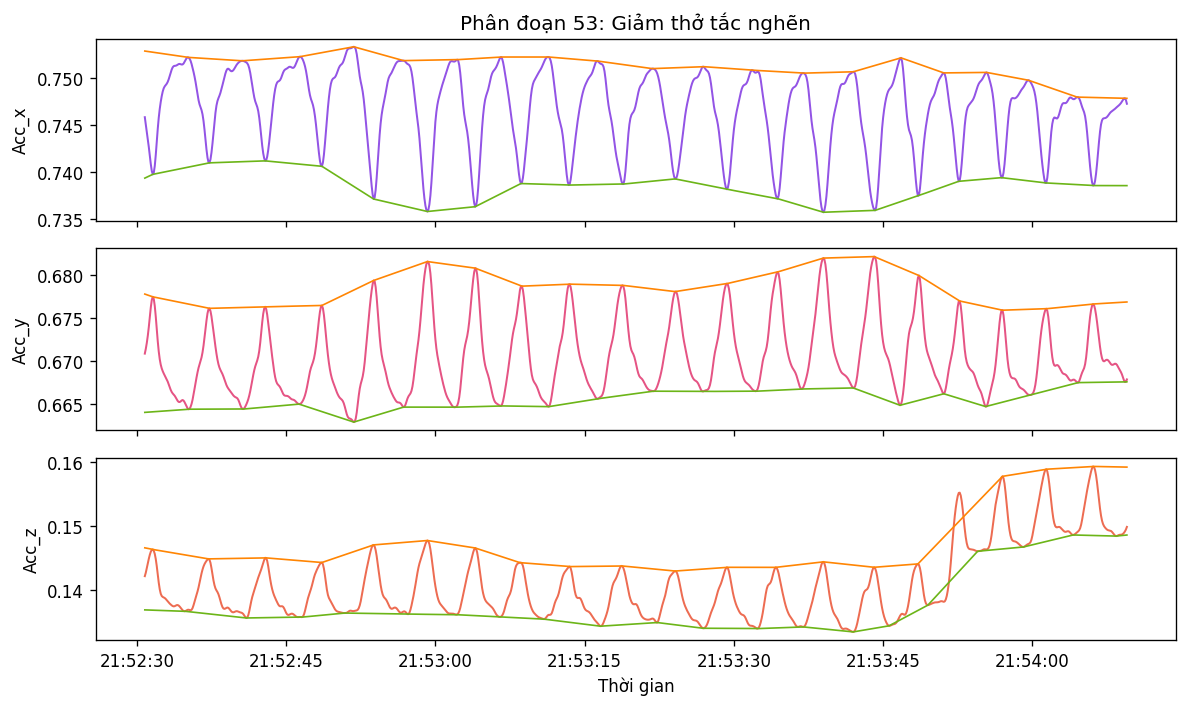

In [18]:
visualize_envelop(ub = ub,lb = lb,
                  raw_df = acc_db['Raw_signal'], 
                    evt_lst = psg_score['PSG_score'], 
                    idx = 53
                     )